<a href="https://colab.research.google.com/github/areebaxijaz/AER850-Project-2/blob/main/AER850Project2Part1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 1: Steps 1-4 (Data Processing, Model Building, Training, and Evaluation)**

## Step 1: Data Processing: Use ImageDataGenerator from Keras to augment and load the images.

In [45]:
from google.colab import files
uploaded = files.upload()

Saving Project 2 Data.zip to Project 2 Data.zip


In [46]:
!unzip "Project 2 Data.zip"

Archive:  Project 2 Data.zip
replace Data/test/crack/IMG_20230511_101043_jpg.rf.0f754b4a1df6afcfed04bb8468a5f2cb.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Data/test/crack/IMG_20230511_101043_jpg.rf.0f754b4a1df6afcfed04bb8468a5f2cb.jpg  
  inflating: Data/test/crack/IMG_20230511_101049_jpg.rf.0cb3a87694d1ef816b1ad557175eb6f8.jpg  
  inflating: Data/test/crack/IMG_20230511_101049_jpg.rf.1f2f7a74cb02d76f7d523d1ae25cb1bf.jpg  
  inflating: Data/test/crack/IMG_20230511_101055_jpg.rf.d6d6f95e4365a1fda10c0ecbd0a3bb5a.jpg  
  inflating: Data/test/crack/IMG_20230511_102305_jpg.rf.ef4f930cc9c6f3d84f00622649d97503.jpg  
  inflating: Data/test/crack/IMG_20230511_102314_jpg.rf.4a4a03ff54b9657b540a073d7602fda7.jpg  
  inflating: Data/test/crack/IMG_20230511_102354_jpg.rf.fcbba70844566e28f4920a3619857542.jpg  
  inflating: Data/test/crack/IMG_20230511_102400_jpg.rf.2d4cf4ae499a7518335c95f2fe4f9bc2.jpg  
  inflating: Data/test/crack/IMG_20230511_103018_jpg.rf.a08632c1cf36bb67517c18010d

In [47]:
# Importing required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

In [48]:
# Set the image dimensions and batch size for training
IMG_WIDTH, IMG_HEIGHT = 500, 500  # We want to resize images to 500x500
BATCH_SIZE = 32  # The batch size is set to 32 for training

# Define the directories where the data is stored
train_dir = '/content/Data/train'  # Path to training data
validation_dir = '/content/Data/valid'  # Path to validation data
test_dir = '/content/Data/test'  # Path to test data

In [49]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    image_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

Found 1942 files belonging to 3 classes.
Found 431 files belonging to 3 classes.


In [50]:
# Data augmentation for training data
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),         # Rescaling images
    tf.keras.layers.RandomFlip("horizontal"),  # Randomly flip images horizontally
    tf.keras.layers.RandomRotation(0.1),       # Randomly rotate images
    tf.keras.layers.RandomZoom(0.1)            # Randomly zoom images
])

In [51]:
# Only rescaling for validation data
validation_dataset = validation_dataset.map(lambda x, y: (x / 255.0, y))

# Apply data augmentation to the training dataset
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))

## Step 2: Neural Network Architecture Design

In [52]:
# Define the model
model = Sequential()

# Convolutional layers with MaxPooling and Dropout
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the results and add dense layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # 3 output classes: crack, missing-head, paint-off

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Step 3: Hyperparameter Analysis

In [53]:
# Compile the model with chosen hyperparameters
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Step 4: Model Evaluation

In [54]:
# Train the model and store the training history
epochs = 20
history = model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=validation_dataset
)

Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1460s 24s/step - accuracy: 0.4194 - loss: 1.6877 - val_accuracy: 0.6218 - val_loss: 0.7630
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1450s 24s/step - accuracy: 0.6228 - loss: 0.8312 - val_accuracy: 0.6682 - val_loss: 0.7227
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1443s 24s/step - accuracy: 0.6519 - loss: 0.7796 - val_accuracy: 0.6914 - val_loss: 0.6906
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1443s 24s/step - accuracy: 0.6673 - loss: 0.7409 - val_accuracy: 0.5476 - val_loss: 0.8334
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1457s 24s/step - accuracy: 0.6761 - loss: 0.7150 - val_accuracy: 0.7262 - val_loss: 0.6360
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1463s 24s/step - accuracy: 0.6955 - loss: 0.6682 - val_accuracy: 0.7169 - val_loss: 0.7150
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1461s 24s/step - accuracy: 0.7012 - loss: 0.6507 - val_accuracy: 0.7494 - val_loss: 0.6311
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1438s 24s/step - accuracy: 0.7266 - loss: 0.6197 - val_accu

In [55]:
# Plotting training and validation loss and accuracy
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

Text(0.5, 1.0, 'Accuracy')

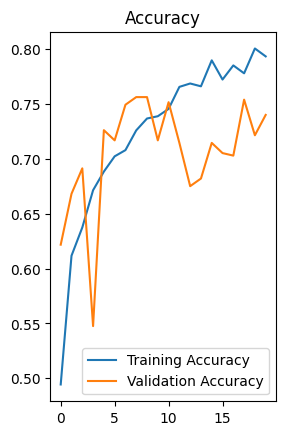

In [56]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

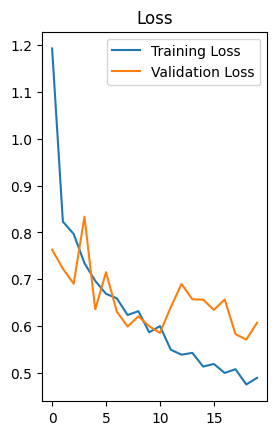

In [57]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [58]:
# Save the model
model.save('/content/my_trained_model.keras')

from google.colab import drive
drive.mount('/content/drive')

model.save('/content/drive/MyDrive/my_trained_model.keras')


Mounted at /content/drive


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


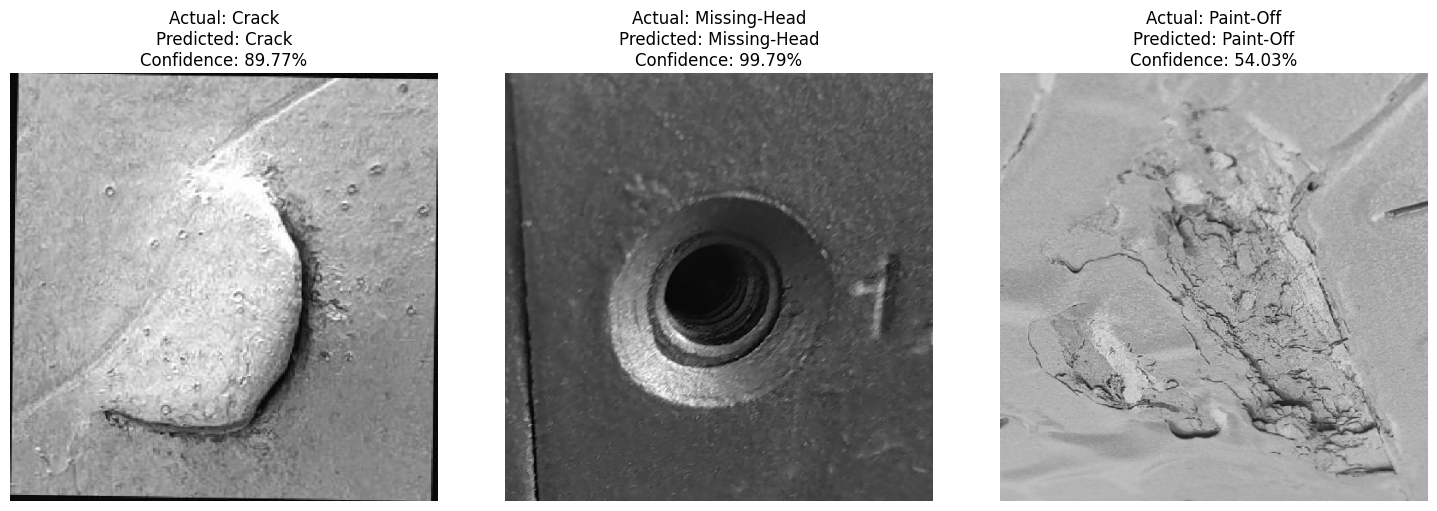

In [59]:
# Importing required packages for model testing
from tensorflow.keras.preprocessing import image

# Define image size
IMG_WIDTH, IMG_HEIGHT = 500, 500

# Class labels (in the same order as they were used during training)
class_labels = ['Crack', 'Missing-Head', 'Paint-Off']

# Function to load, preprocess, and predict the class of an image
def process_and_predict(img_path):
    # Load the image and resize it to match the input shape of the model
    img = image.load_img(img_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
    # Convert the image to an array and normalize it
    img_array = image.img_to_array(img) / 255.0
    # Add a batch dimension to the image
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the class of the image
    prediction = model.predict(img_array)
    # Find the index of the class with the highest probability
    predicted_class = np.argmax(prediction, axis=1)[0]
    confidence = np.max(prediction) * 100  # Confidence level

    return img, predicted_class, confidence
# Test images paths
test_images = [
    ('/content/Data/test/crack/test_crack.jpg','Crack'),
    ('/content/Data/test/missing-head/test_missinghead.jpg','Missing-Head'),
    ('/content/Data/test/paint-off/test_paintoff.jpg','Paint-Off')
]
# Plotting the test images with actual and predicted labels
fig, axes = plt.subplots(1, len(test_images), figsize=(15, 5))
for i, (img_path, true_label) in enumerate(test_images):
    # Process and predict each test image
    img, predicted_class, confidence = process_and_predict(img_path)

    # Display the image
    axes[i].imshow(img)
    axes[i].axis('off')

    # Set the title with the actual label, predicted label, and confidence
    predicted_label = class_labels[predicted_class]
    axes[i].set_title(f"Actual: {true_label}\nPredicted: {predicted_label}\nConfidence: {confidence:.2f}%")

# Show the plot
plt.tight_layout()
plt.show()